# Graded Challenge 3
---

## Introduction

Name  : Izzatur Arrasya 002<br>

## Dataset Introduction
<b>Heart Failure Prediction</b> <br>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Objective

In this notebook of Graded Challenge 3 was created to evaluate Ensemble (Random Tree and Boost) concept as follows:

1. Able to understand the concept of classification with Ensemble model
2. Able to prepare data for use in Ensemble model
3. Able to implement Ensemble model to make predictions

and I will try to predict Heart Failure based on the features or variables available in this dataset

## Import Library
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.mixture import GaussianMixture

## Data Loading
---

In [2]:
#load data using pandas
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


1. Sex - Gender of patient Male = 1, Female =0
2. Age - Age of patient
3. Diabetes - 0 = No, 1 = Yes
4. Anaemia - 0 = No, 1 = Yes
5. High_blood_pressure - 0 = No, 1 = Yes
6. Smoking - 0 = No, 1 = Yes
7. DEATH_EVENT - 0 = No, 1 = Yes

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

From the data above, we get some of information of every column in data frame :

1. Column 'age' : Age
2. Column 'anaemia' : Decrease of red blood cells or hemoglobin (boolean)
3. Column 'creatinine_phosphokinase' : Level of the CPK enzyme in the blood (mcg/L)
4. Column 'diabetes' : If the patient has diabetes (boolean)
5. Column 'ejection_fraction': Percentage of blood leaving the heart at each contraction (percentage) 
6. Column 'high_blood_pressure' : "If the patient has hypertension (boolean)
7. Column 'platelets' : Platelets in the blood (kiloplatelets/mL)
8. Column 'serum_creatinine' : Level of serum creatinine in the blood (mg/dL)
9. Column 'serum_sodium' :Level of serum sodium in the blood (mEq/L)
10. Column 'sex' : Woman or man (binary)
11. Column 'smoking' : If the patient smokes or not (boolean)
12. Column 'time' : Follow-up period (days)
13. Column 'DEATH_EVENT' : If the patient deceased during the follow-up period (boolean)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning
---

copy the dataframe so we have the original version of dataset as a backup if the work got messy

In [6]:
#copy dataframe
df_hf = df.copy()

In [7]:
#check any missing value
df_hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
#checking any duplicate row
df_hf.duplicated().sum()

0

## Data Exploration Analysis
---

<Figure size 576x576 with 0 Axes>

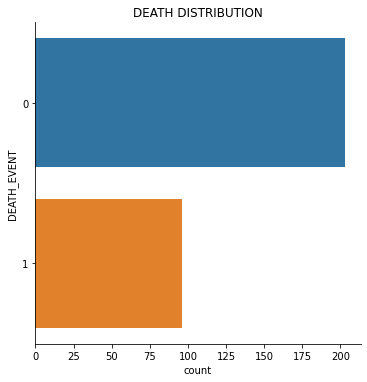

In [9]:
plt.figure(figsize=(8,8))
sns.catplot(y='DEATH_EVENT',data=df_hf,kind='count')
plt.title("DEATH DISTRIBUTION")
plt.show()

About 1/3 of death in our data is caused by Heart Failure.

In [10]:
hf_sex = len(df_hf)
hf_w = len(df_hf[df_hf["sex"]==0])
hf_m = hf_sex - hf_w

men_died = len(df_hf.loc[(df_hf["DEATH_EVENT"]==1) &(df_hf['sex']==0)])
men_survived = hf_m - men_died

women_died = len(df_hf.loc[(df_hf["DEATH_EVENT"]==1) & (df_hf['sex']==1)])
women_survived = hf_w - women_died

labels = ['Men died','Men survived','Women died','Women survived']
values = [men_died, men_survived, women_died, women_survived]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="distribution DEATH EVENT according to their gender")
fig.show()

In [11]:
fig = px.pie(df, values='sex', names='DEATH_EVENT',color_discrete_sequence=["pink", "blue"]
            ,title='Proportional of death event based on sex')
fig.show()

from proportion above we can see that men 32% of our death data

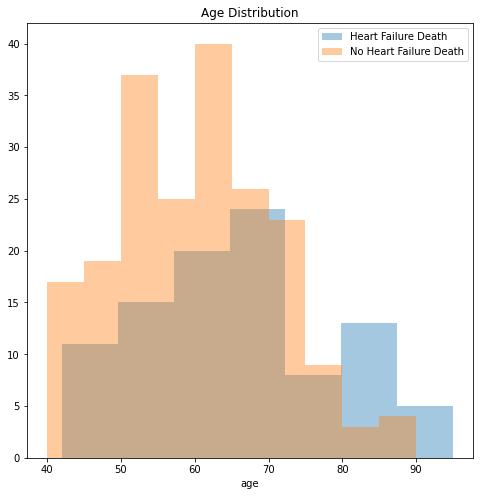

In [12]:
death = df_hf[df_hf['DEATH_EVENT']==1]
non_heart_death = df_hf[df_hf['DEATH_EVENT']==0]

plt.figure(figsize=(8,8))
sns.distplot(death['age'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['age'],kde=False,label='No Heart Failure Death')
plt.title('Age Distribution')
plt.legend()
plt.show()

Most of death due to Heart Failure is in the age between 50 and 60 years.

<Figure size 576x576 with 0 Axes>

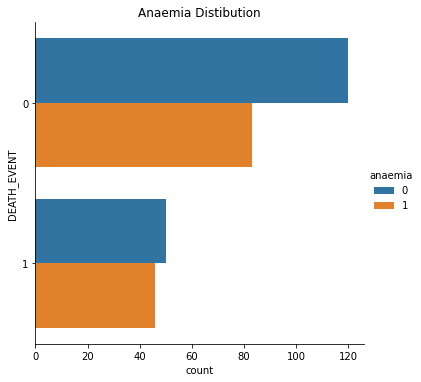

In [13]:
plt.figure(figsize=(8,8))
sns.catplot(y='DEATH_EVENT',data=df_hf,kind='count',hue='anaemia')
plt.title('Anaemia Distibution')
plt.show()

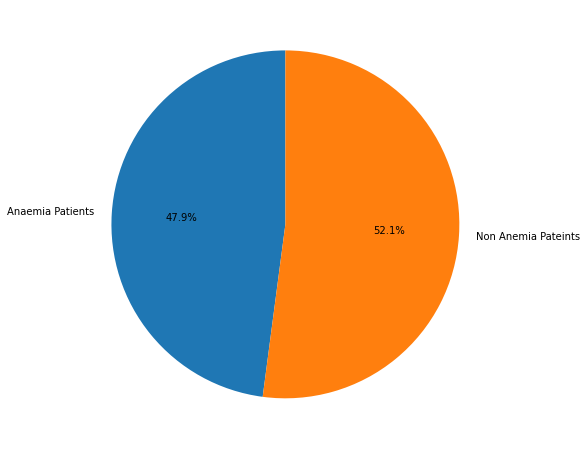

In [14]:
label = ['Anaemia Patients','Non Anemia Pateints']
values = [len(death[death['anaemia']==1]),len(death[death['anaemia']==0])]
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,startangle=90,autopct='%1.1f%%')
plt.show()

we can see from the graph there is no correlation between having anaemia and death due to heart failure.

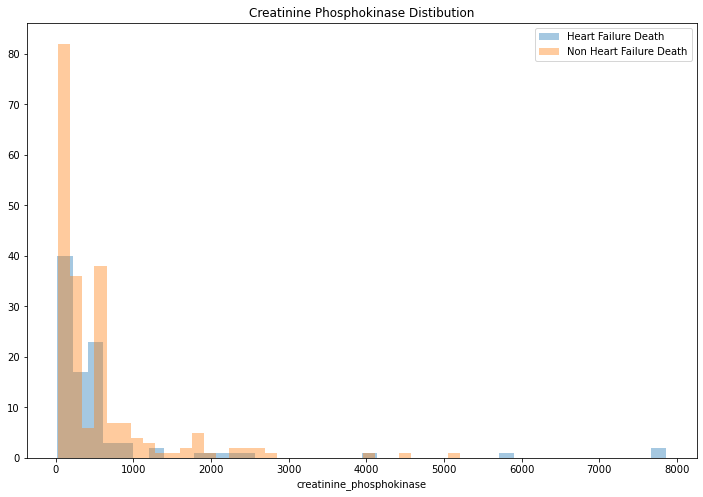

In [15]:
plt.figure(figsize=(12,8))
sns.distplot(death['creatinine_phosphokinase'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['creatinine_phosphokinase'],kde=False,label='Non Heart Failure Death')
plt.title('Creatinine Phosphokinase Distibution')
plt.legend()
plt.show()

Most of the heart hailure death have low creatine phosphokinase.

<Figure size 576x576 with 0 Axes>

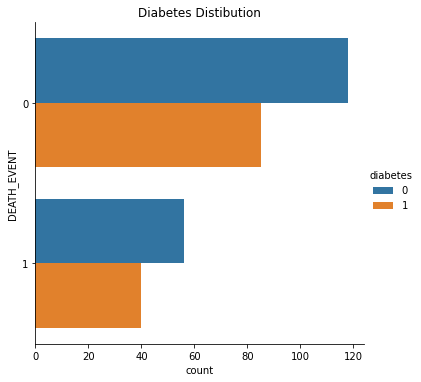

In [16]:
plt.figure(figsize=(8,8))
sns.catplot(y='DEATH_EVENT',hue='diabetes',data=df_hf,kind='count')
plt.title('Diabetes Distibution')
plt.show()

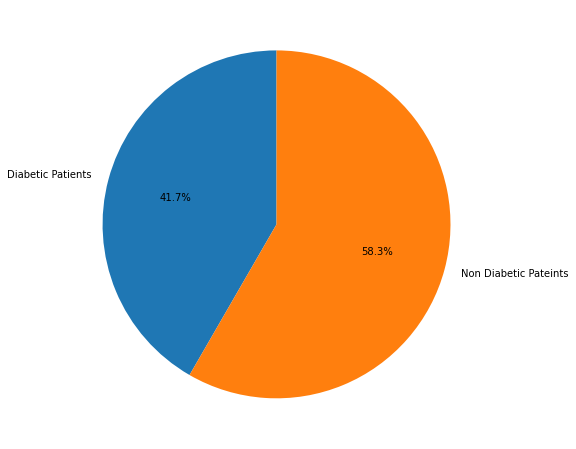

In [17]:
label = ['Diabetic Patients','Non Diabetic Pateints']
values = [len(death[death['diabetes']==1]),len(death[death['diabetes']==0])]
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,startangle=90,autopct='%1.1f%%')
plt.show()

there's no connection between diabeties have no effect on heart failure

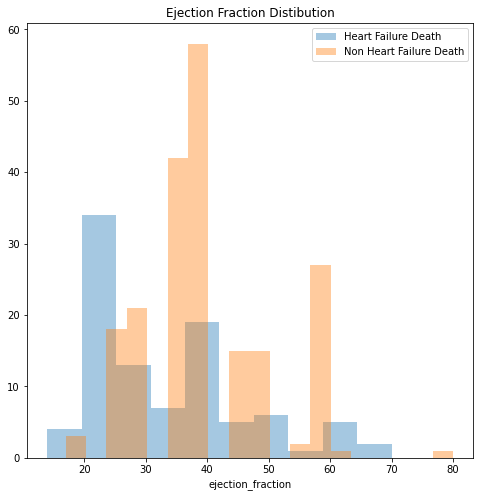

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(death['ejection_fraction'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['ejection_fraction'],kde=False,label='Non Heart Failure Death')
plt.title('Ejection Fraction Distibution')
plt.legend()
plt.show()

Most of the heart failure deaths have ejection fraction between 30-40

<Figure size 576x576 with 0 Axes>

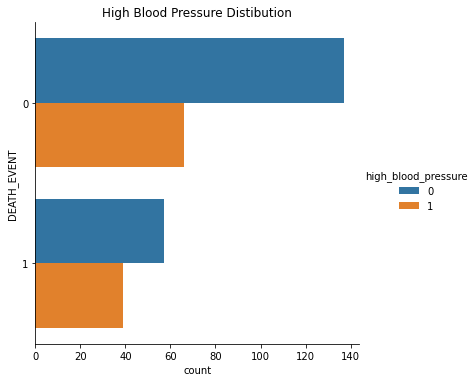

In [19]:
plt.figure(figsize=(8,8))
sns.catplot(y='DEATH_EVENT',data=df_hf,hue='high_blood_pressure',kind='count')
plt.title('High Blood Pressure Distibution')
plt.show()

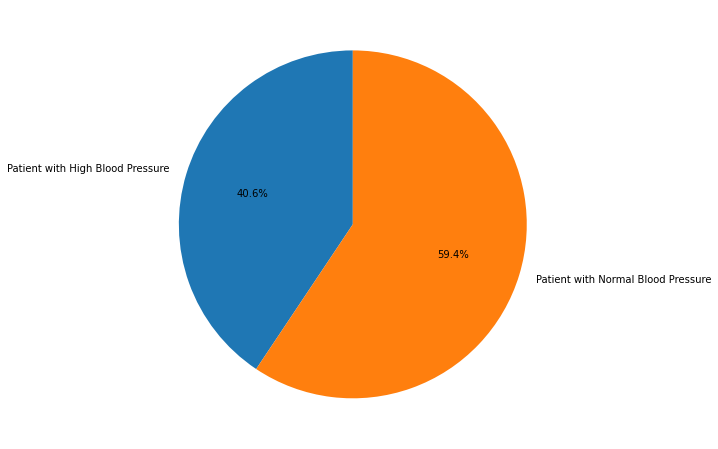

In [20]:
label = ['Patient with High Blood Pressure','Patient with Normal Blood Pressure']
values = [len(death[death['high_blood_pressure']==1]),len(death[death['high_blood_pressure']==0])]
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,startangle=90,autopct='%1.1f%%')
plt.show()

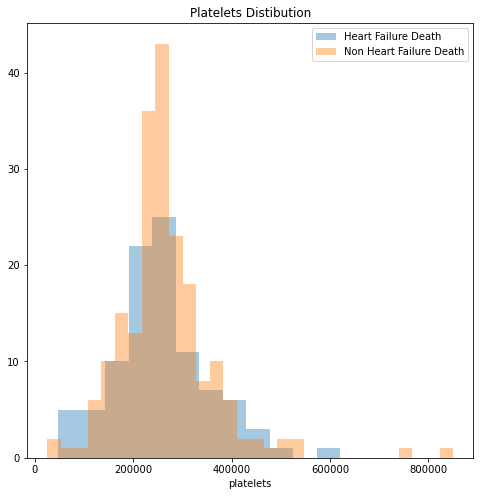

In [21]:
plt.figure(figsize=(8,8))
sns.distplot(death['platelets'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['platelets'],kde=False,label='Non Heart Failure Death')
plt.title('Platelets Distibution')
plt.legend()
plt.show()

heart failure deaths have low platelets count.

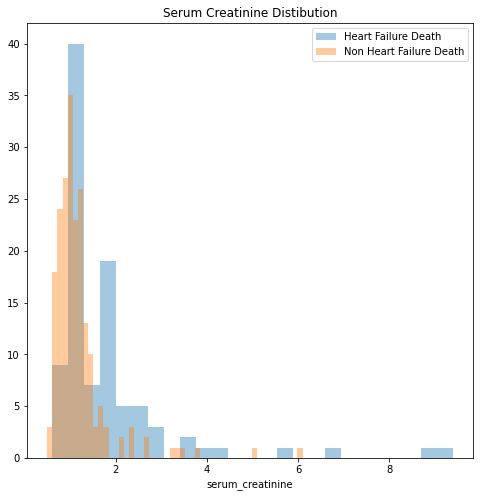

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(death['serum_creatinine'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['serum_creatinine'],kde=False,label='Non Heart Failure Death')
plt.title('Serum Creatinine Distibution')
plt.legend()
plt.show()

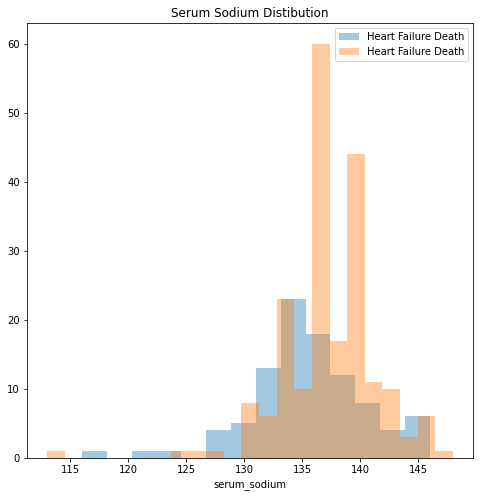

In [23]:
plt.figure(figsize=(8,8))
sns.distplot(death['serum_sodium'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['serum_sodium'],kde=False,label='Heart Failure Death')
plt.legend()
plt.title('Serum Sodium Distibution')
plt.show()

Heart failure death patients have lower Serum Sodium.

<Figure size 576x576 with 0 Axes>

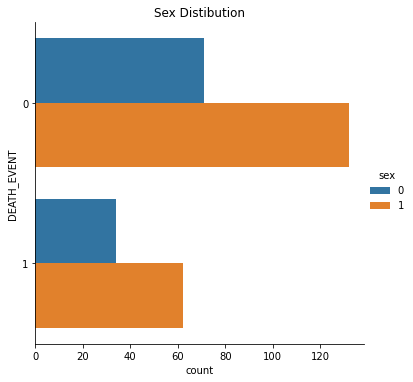

In [24]:
plt.figure(figsize=(8,8))
sns.catplot(y='DEATH_EVENT',data=df_hf,hue='sex',kind='count')
plt.title('Sex Distibution')
plt.show()

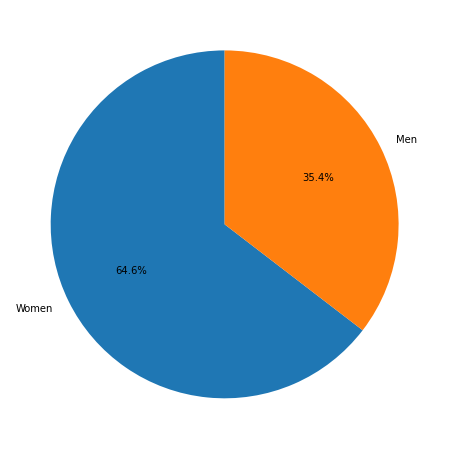

In [25]:
label = ['Women','Men']
values = [len(death[death['sex']==1]),len(death[death['sex']==0])]
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,startangle=90,autopct='%1.1f%%')
plt.show()

Most of Heart Failure case from women.

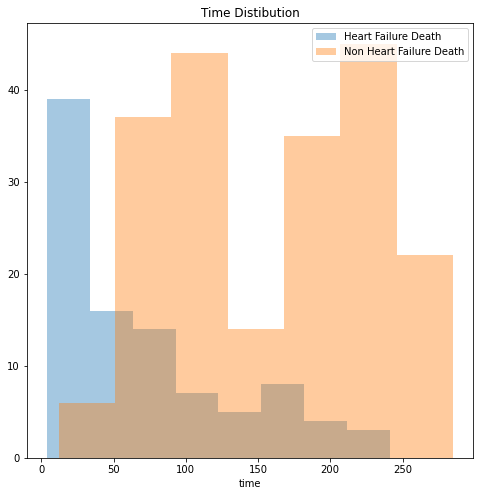

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(death['time'],kde=False,label='Heart Failure Death')
sns.distplot(non_heart_death['time'],kde=False,label='Non Heart Failure Death')
plt.legend()
plt.title('Time Distibution')
plt.show()

Most of heart failure death have low follow-up period.

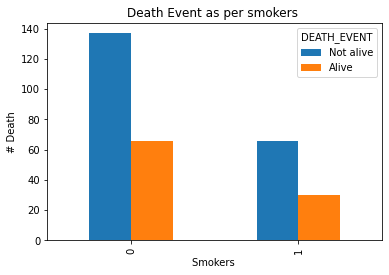

In [27]:
pd.crosstab(df.smoking ,df.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per smokers ')
plt.xlabel('Smokers ')
plt.ylabel('# Death')
plt.show()

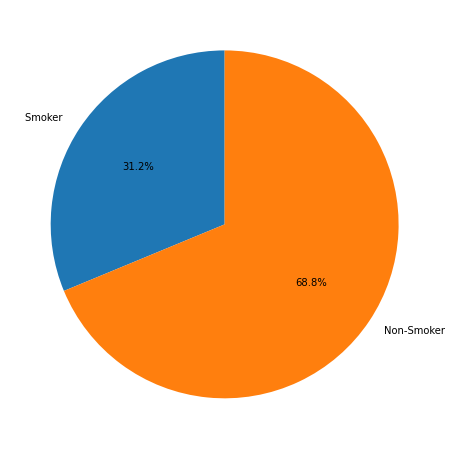

In [28]:
label = ['Smoker ','Non-Smoker']
values = [len(death[death['smoking']==1]),len(death[death['smoking']==0])]
plt.figure(figsize=(8,8))
plt.pie(values,labels=label,startangle=90,autopct='%1.1f%%')
plt.show()

In [29]:
df_hf.corr().style.background_gradient(cmap='Spectral')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Data Preprocessing
---

In [30]:
#define X
y = df_hf['DEATH_EVENT']
X = df_hf.drop('DEATH_EVENT',axis=1)

In [31]:
num_col = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

In [32]:
num_data = df_hf[num_col]
cat_col = df_hf[cat_col]

In [33]:
#Noramlizing the numerical Data
scaler = StandardScaler()

num_data_sc = scaler.fit_transform(num_data)
num_data_sc = pd.DataFrame(num_data_sc,columns=num_data.columns)
num_data_sc.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [34]:
data_sc = pd.concat([num_data_sc,cat_col],axis=1)
data_sc.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0


In [35]:
data_sc = data_sc[['age','ejection_fraction','platelets','serum_creatinine','time','creatinine_phosphokinase','serum_sodium']]

In [36]:
X_np = np.array(data_sc)
y_np = np.array(y)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_np,y_np,test_size=0.2)

In [38]:
print('Train Data Shape:',X_train.shape)
print('Validation Data Shape:',X_test.shape)

Train Data Shape: (239, 7)
Validation Data Shape: (60, 7)


## Models
---

### Support Vector Machine

In [39]:
t0 = time.time()
models= ['SVM: ',SVC()],


for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Validation Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
    print('Time taken :' , time.time()-t0)
    

SVM: 
Validation Accuracy:  0.8
Training Accuracy:  0.8870292887029289
Time taken : 0.010963201522827148


### Random Forest Classifier

In [40]:
t0 = time.time()
models= ['Random Forest Classifier: ',RandomForestClassifier()],


for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Validation Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
    print('Time taken :' , time.time()-t0)

Random Forest Classifier: 
Validation Accuracy:  0.8333333333333334
Training Accuracy:  1.0
Time taken : 0.11141443252563477


### Ada Boost

In [41]:
t0 = time.time()
models= ['Ada Boost: ',AdaBoostClassifier()],


for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Validation Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
    print('Time taken :' , time.time()-t0)

Ada Boost: 
Validation Accuracy:  0.8
Training Accuracy:  0.9372384937238494
Time taken : 0.05899953842163086


### XG Boost

In [42]:
t0 = time.time()
models= ['XG Boost:',XGBClassifier()],


for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Validation Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Training Accuracy: ',accuracy_score(y_train,model.predict(X_train)))
    print('Time taken :' , time.time()-t0)

[21:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost:
Validation Accuracy:  0.8166666666666667
Training Accuracy:  1.0
Time taken : 0.08000016212463379


## Models Evaluation
---

### Support Vector Machine

In [43]:
t0 = time.time()
models= ['SVM: ',SVC()],

for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('SVM Model Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('SVM Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test)))
    print('SVM Model Classification Report: ',classification_report(y_test,model.predict(X_test)))
    print('SVM Model AUC Score: ',roc_auc_score(y_test,model.predict(X_test)))
    print('SVM Model F1 Score: ',f1_score(y_test,model.predict(X_test)))
    print('Time taken :' , time.time()-t0)

SVM: 
SVM Model Accuracy:  0.8
SVM Model Confusion Matrix:  [[33  6]
 [ 6 15]]
SVM Model Classification Report:                precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.71      0.71      0.71        21

    accuracy                           0.80        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.80      0.80      0.80        60

SVM Model AUC Score:  0.7802197802197803
SVM Model F1 Score:  0.7142857142857143
Time taken : 0.016998767852783203


### Random Forest Classifier

In [44]:
t0 = time.time()
models= ['Random Forest Classifier: ',RandomForestClassifier()],

for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Random Forest Classifier Model Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Random Forest Classifier Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test)))
    print('Random Forest Classifier Model Classification Report: ',classification_report(y_test,model.predict(X_test)))
    print('Random Forest Classifier Model AUC Score: ',roc_auc_score(y_test,model.predict(X_test)))
    print('Random Forest Classifier Model F1 Score: ',f1_score(y_test,model.predict(X_test)))
    print('Time taken :' , time.time()-t0)

Random Forest Classifier: 
Random Forest Classifier Model Accuracy:  0.8166666666666667
Random Forest Classifier Model Confusion Matrix:  [[34  5]
 [ 6 15]]
Random Forest Classifier Model Classification Report:                precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.75      0.71      0.73        21

    accuracy                           0.82        60
   macro avg       0.80      0.79      0.80        60
weighted avg       0.81      0.82      0.82        60

Random Forest Classifier Model AUC Score:  0.793040293040293
Random Forest Classifier Model F1 Score:  0.7317073170731706
Time taken : 0.1400001049041748


### Ada Boost

In [45]:
t0 = time.time()
models= ['Ada Boost: ',AdaBoostClassifier()],

for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('Ada Boost Model Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('Ada Boost Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test)))
    print('Ada Boost Model Classification Report: ',classification_report(y_test,model.predict(X_test)))
    print('Ada Boost Model AUC Score: ',roc_auc_score(y_test,model.predict(X_test)))
    print('Ada Boost Model F1 Score: ',f1_score(y_test,model.predict(X_test)))
    print('Time taken :' , time.time()-t0)

Ada Boost: 
Ada Boost Model Accuracy:  0.8
Ada Boost Model Confusion Matrix:  [[34  5]
 [ 7 14]]
Ada Boost Model Classification Report:                precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.74      0.67      0.70        21

    accuracy                           0.80        60
   macro avg       0.78      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60

Ada Boost Model AUC Score:  0.7692307692307692
Ada Boost Model F1 Score:  0.7
Time taken : 0.08484530448913574


### XG Boost

In [46]:
t0 = time.time()
models= ['XG Boost:',XGBClassifier()],

for name,model in models:
    model = model
    model.fit(X_train,y_train)
    print(name)
    print('XG Boost Model Accuracy: ',accuracy_score(y_test,model.predict(X_test)))
    print('XG Boost Model Confusion Matrix: ',confusion_matrix(y_test,model.predict(X_test)))
    print('XG Boost Model Classification Report: ',classification_report(y_test,model.predict(X_test)))
    print('XG Boost Model AUC Score: ',roc_auc_score(y_test,model.predict(X_test)))
    print('XG Boost Model F1 Score: ',f1_score(y_test,model.predict(X_test)))
    print('Time taken :' , time.time()-t0)

[21:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost:
XG Boost Model Accuracy:  0.8166666666666667
XG Boost Model Confusion Matrix:  [[33  6]
 [ 5 16]]
XG Boost Model Classification Report:                precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.73      0.76      0.74        21

    accuracy                           0.82        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

XG Boost Model AUC Score:  0.8040293040293041
XG Boost Model F1 Score:  0.7441860465116279
Time taken : 0.06399822235107422


From model evaluation we can conclude that SVM got better accuracy followed by Random Tree and XG Boost with same value accuracy and last is Ada Boost, but from four models there's do not have that much difference

## Model Inference
---

In [60]:
#Data Sample
sampledf= df.sample(n=100)
sampledf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
232,40.0,1,129,0,35,0,255000.0,0.9,137,1,0,209,0
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126,1
231,70.0,0,93,0,35,0,185000.0,1.1,134,1,1,208,0
200,63.0,1,1767,0,45,0,73000.0,0.7,137,1,0,186,0
216,70.0,0,1202,0,50,1,358000.0,0.9,141,0,0,196,0


In [61]:
#defining X
y_sample = sampledf['DEATH_EVENT'].values
X_sample = sampledf.drop(columns=['DEATH_EVENT'],axis=1).values

## Conclusion
---

1. SVM is still the best model because, compared to others models, but Random Forest Classification and XGboost got high accuracy too
2. Women are more prone to death because of heart failure.
3. 1/3 of our data died caused by heart failure.